# Exploratory Data Analysis

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../data/raw/gdm.csv")
df.head()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,"11,2",2.0,86.0,30.85,"40,2",1,3930,1


Number is a unique id that can be dropped, target is gestational dm (0-absent, 1-present). Features such as type of delivery, child birth weight, gestational age at birth can be dropped before training as these events happen at the final stage of pregnancy and therefore have no role on gdm which is diagnosed between 26-28 weeks.Gestational age would need formatting.

## Data Cleaning

In [3]:
#delete number column 
del df["number"] 

# Reformatting "current gestational age", "gestational age at birth"
df["current gestational age"] =df["current gestational age"].apply(lambda x: str(x.replace(',','.'))).astype(float)
df["gestational age at birth"] =df["gestational age at birth"].apply(lambda x: str(x.replace(',','.'))).astype(float)


#Check missing values, datatypes, dimension
print(f"Columns are: {df.columns}")
print("-"*50)
print(f"Shape of the dataframe is: {df.shape}")
print("-"*50)
print(f"Basic information: {df.info()}")

Columns are: Index(['age (years)', 'ethnicity', 'diabetes mellitus',
       'mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)',
       'central armellini fat (mm)', 'current gestational age',
       'pregnancies (number)', 'first fasting glucose (mg/dl)',
       'bmi pregestational (kg/m)', 'gestational age at birth',
       'type of delivery', 'child birth weight (g)', 'gestational dm'],
      dtype='object')
--------------------------------------------------
Shape of the dataframe is: (133, 14)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age (years)                    133 non-null    int64  
 1   ethnicity                      132 non-null    float64
 2   diabetes mellitus              133 non-null    int64  
 3   mean diastolic bp (mmhg)       133

There are 13 features + 1 target, missing values in ethnicity, pregnancies (number), first fasting glucose (mg/dl) and mixed data types. 

## Descriptive statistics

In [4]:
df.describe()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
count,133.000000,132.000000,133.000000,133.000000,133.000000,133.000000,133.000000,128.000000,103.000000,132.000000,133.000000,133.000000,133.000000,133.000000
mean,25.804511,0.439394,0.007519,70.593985,116.578947,44.230827,15.411278,2.351562,81.272816,27.871136,39.010526,0.240602,3257.563910,0.135338
std,6.366887,0.498204,0.086711,8.657662,13.879602,14.606195,3.817735,1.686397,9.429794,6.874268,1.950457,0.429065,490.318578,0.343378
min,15.000000,0.000000,0.000000,51.500000,90.000000,12.700000,6.200000,1.000000,60.000000,15.810000,27.100000,0.000000,1105.000000,0.000000
25%,21.000000,0.000000,0.000000,64.500000,107.000000,34.600000,13.000000,1.000000,76.500000,22.550000,38.300000,0.000000,2944.000000,0.000000
50%,25.000000,0.000000,0.000000,70.000000,114.000000,42.500000,16.200000,2.000000,80.000000,26.260000,39.400000,0.000000,3220.000000,0.000000
75%,30.000000,1.000000,0.000000,75.500000,125.000000,52.700000,18.100000,3.000000,86.500000,30.935000,40.300000,0.000000,3610.000000,0.000000
max,43.000000,1.000000,1.000000,100.500000,167.000000,94.400000,31.500000,9.000000,114.000000,55.360000,41.100000,1.000000,4534.000000,1.000000


Mean age is 26, most do not have previous diabetes, maximum number of pregnancy is 9, mean bmi is 28 which suggest overweight, type of delivery in majority was normal/vaginal. Data shows there ia a single cases with previous Diabetes.  

## Analyze each feature in reference to presence or absence of GDM

In [21]:
print(df.groupby("gestational dm")["age (years)"].mean())
print(df.groupby("gestational dm")["mean diastolic bp (mmhg)"].mean())
print(df.groupby("gestational dm")["mean systolic bp (mmhg)"].mean())
print(df.groupby("gestational dm")["central armellini fat (mm)"].mean())
print(df.groupby("gestational dm")["current gestational age"].mean())
print(df.groupby("gestational dm")["pregnancies (number)"].mean())
print(df.groupby("gestational dm")["first fasting glucose (mg/dl)"].mean())
print(df.groupby("gestational dm")["bmi pregestational (kg/m)"].mean())
print(df.groupby("gestational dm")["gestational age at birth"].mean())
print(df.groupby("gestational dm")["child birth weight (g)"].mean())

gestational dm
0    25.295652
1    29.055556
Name: age (years), dtype: float64
gestational dm
0    69.986957
1    74.472222
Name: mean diastolic bp (mmhg), dtype: float64
gestational dm
0    115.969565
1    120.472222
Name: mean systolic bp (mmhg), dtype: float64
gestational dm
0    42.487391
1    55.369444
Name: central armellini fat (mm), dtype: float64
gestational dm
0    15.554783
1    14.494444
Name: current gestational age, dtype: float64
gestational dm
0    2.234234
1    3.117647
Name: pregnancies (number), dtype: float64
gestational dm
0    79.686517
1    91.357143
Name: first fasting glucose (mg/dl), dtype: float64
gestational dm
0    27.117632
1    32.643333
Name: bmi pregestational (kg/m), dtype: float64
gestational dm
0    39.036522
1    38.844444
Name: gestational age at birth, dtype: float64
gestational dm
0    3230.321739
1    3431.611111
Name: child birth weight (g), dtype: float64


In [41]:
#Check previous diabetic cases and its role on gdm
print("Previous diabetes counts")
a=df["diabetes mellitus"].value_counts()
print(a)
print("Of 132 cases without previous diabetes, number of positive and negative cases:")
# df.loc[df["diabetes mellitus"]==1]
x=df.loc[df["diabetes mellitus"]==0]
x["gestational dm"].value_counts()

Previous diabetes counts
0    132
1      1
Name: diabetes mellitus, dtype: int64
Of 132 cases without previous diabetes, number of positive and negative cases:


0    115
1     17
Name: gestational dm, dtype: int64

1 had previous diabetes and rest 132 didn't. This feature has no signal(variance) and won't be a good predictor of gdm. Of those who didn't have previous diabetes, 17 had gdm.

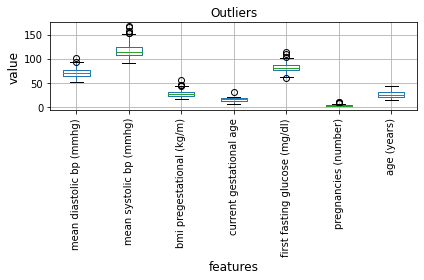

In [7]:
#Check for outliers
boxplot = df.boxplot(column=['mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)', 'bmi pregestational (kg/m)', 'current gestational age', 'first fasting glucose (mg/dl)', 'pregnancies (number)', 'age (years)'],rot=90)
plt.xlabel("features", fontsize=12)
plt.ylabel("value", fontsize=12)
plt.title("Outliers")
plt.tight_layout()
plt.savefig("../reports/figures/outliers.png")

These outliers are also signal as patiets tend to have extreme values. For the hypothesis, inclusion criteria is current gestational age should be <=20 week, hence the outlier (current gestational age=31) has to be dropped.

Percentage of data distribution in the two classes are:
Negative: 86.47
Positive: 13.53


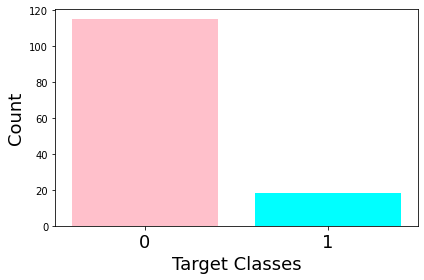

In [12]:
##Check % of data distribution in target (115, 18)
a,b=np.bincount(df['gestational dm'])
print(f"Percentage of data distribution in the two classes are:")
print(f"Negative: {round(a/(a+b)*100,2)}")
print(f"Positive: {round(b/(a+b)*100,2)}")

# Check class distribution
plt.bar(df['gestational dm'].unique(), df['gestational dm'].value_counts(), color = ['pink','cyan'])
plt.xticks([0, 1],fontsize=18 )
plt.xlabel('Target Classes', fontsize=18)
plt.ylabel('Count', fontsize=18);

plt.tight_layout()
plt.savefig("../reports/figures/imbalance.png");

Imbalanced dataset, will need pre-processing

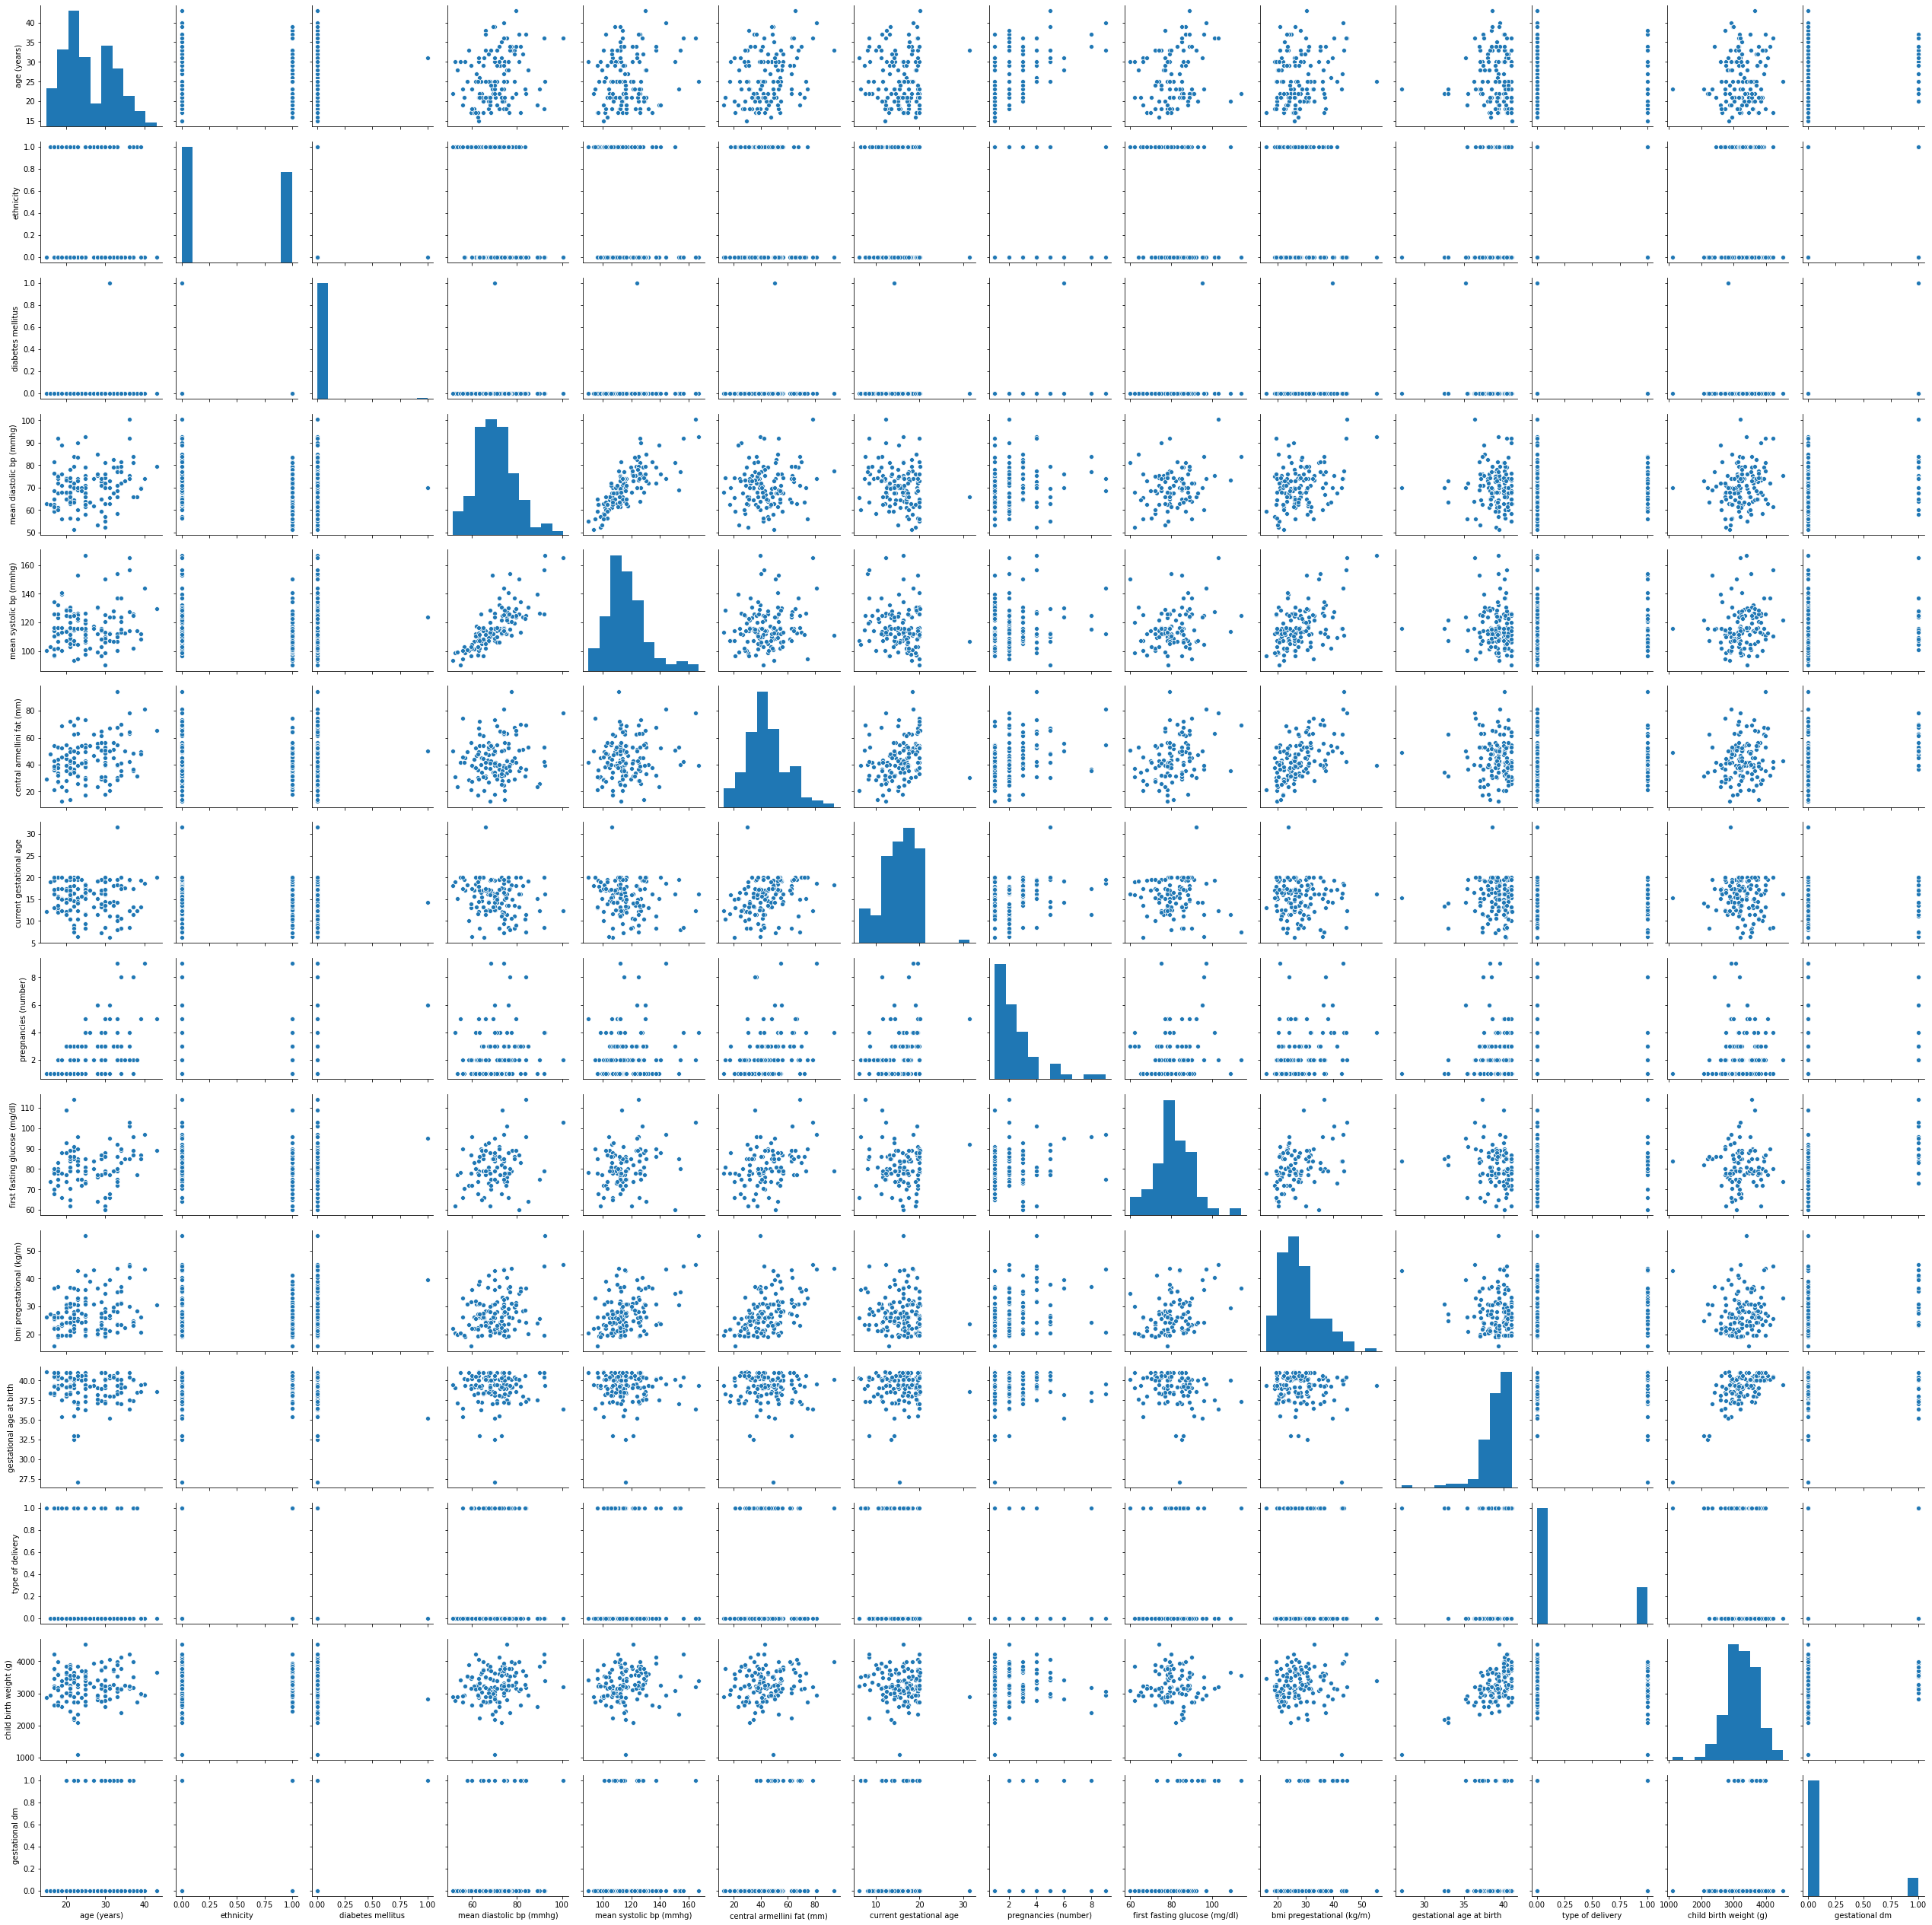

In [10]:
#Pairplot to view data distribution and identify correlation between features and between feature&target
sns.pairplot(df)
plt.savefig("../reports/figures/pairplot")

Takeawayas: There are 8 continuous features, 3 categorical features and one categorical target. The target classes are imbalanced. Pregnancies(number) is highly skewed towards right reflects the description stats above. Mean systolic pressure is lineraly correlated with mean diasystolic pressure, bmi pregestational (kg/m) seems to have corrleation with central armellini fat (mm). Child birth weight and pregnancy number are skewed.

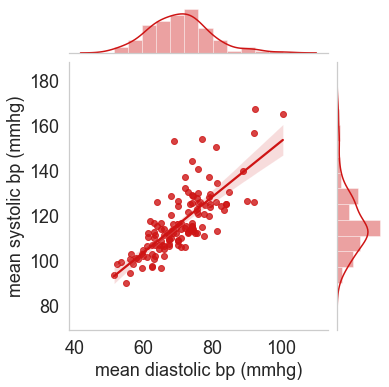

In [42]:
#Check how much is the correlation
import scipy.stats as stats
j=sns.jointplot(df.loc[:,'mean diastolic bp (mmhg)'], df.loc[:,'mean systolic bp (mmhg)'], kind="regg", color="#ce1414")
plt.xlabel('mean diastolic bp (mmhg)', fontsize=18)
plt.ylabel('mean systolic bp (mmhg)', fontsize=18)
plt.tick_params(axis="both", labelsize=18)
plt.savefig("../reports/figures/bp.png");

There is a high correlation between the variables with pearsonr being .77 (which is close to 1). One of the features can be dropped for further analysis. 

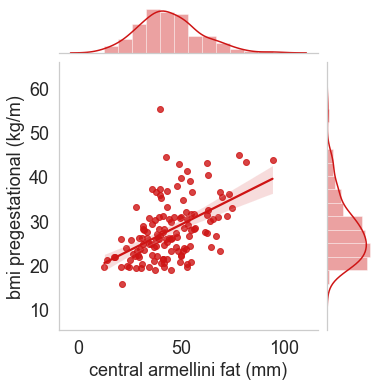

In [43]:
#Check how much is the correlation
sns.jointplot(df.loc[:,'central armellini fat (mm)'], df.loc[:,'bmi pregestational (kg/m)'], kind="regg", color="#ce1414")
# p.annotate(stats.pearsonr)
plt.xlabel('central armellini fat (mm)', fontsize=18)
plt.ylabel('bmi pregestational (kg/m)', fontsize=18)
plt.tick_params(axis="both", labelsize=18)
# plt.legend(fontsize=20)
# plt.show()
plt.savefig("../reports/figures/bmi.png");

There is a positive correlation between the variables with pearsonr being .49. Further analysis would suggest if it would be ideal to drop one of the features.

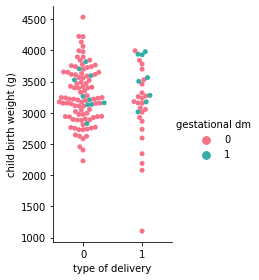

In [13]:
#Analysing relationship between child birth weight, type of delivery and gdm using catplot
g = sns.catplot(x="type of delivery", y="child birth weight (g)",
                hue="gestational dm", 
                data=df, kind="swarm",
                height=4, aspect=.7, palette="husl");

plt.savefig("../reports/figures/bw_gdm_dt.png");

Approx 50% of gdm positive cases had normal and rest 50% had C-section. Minimum child weight in  them is ~3kgs. In gdm -ve cases 80% had normal and rest 20% had C-section. Minimum child weight in  them is 2kgs excluding one extreme case (1.1kg).

/Users/harmeetkaur/opt/anaconda3/envs/project-env/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


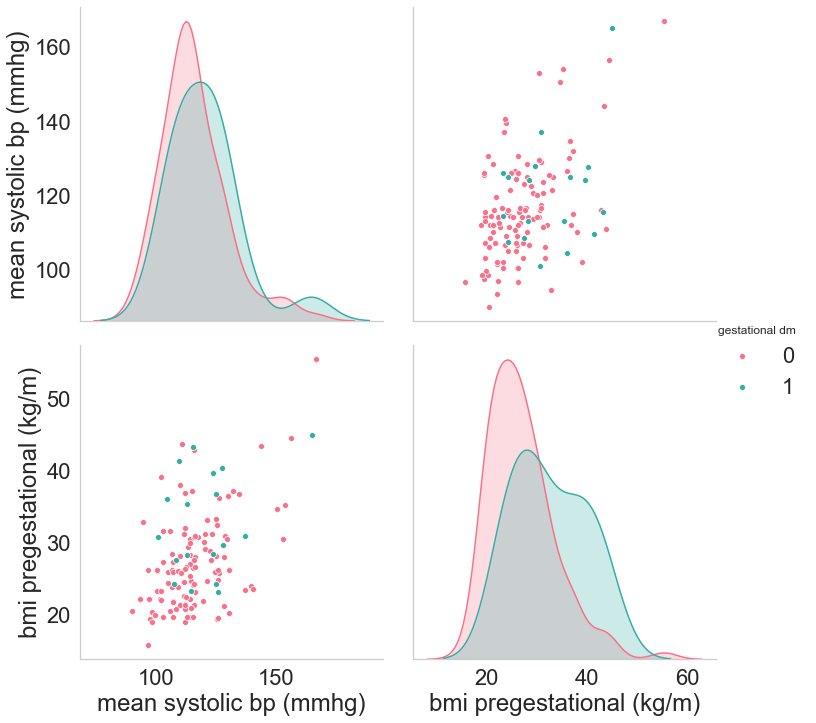

In [38]:
g = sns.pairplot(df,height=3,size=5, vars=["mean systolic bp (mmhg)", "bmi pregestational (kg/m)"], hue="gestational dm", palette="husl")
g=sns.set_style("whitegrid", {'axes.grid' : False})
plt.savefig('../reports/figures/linearity.png')

/Users/harmeetkaur/opt/anaconda3/envs/project-env/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


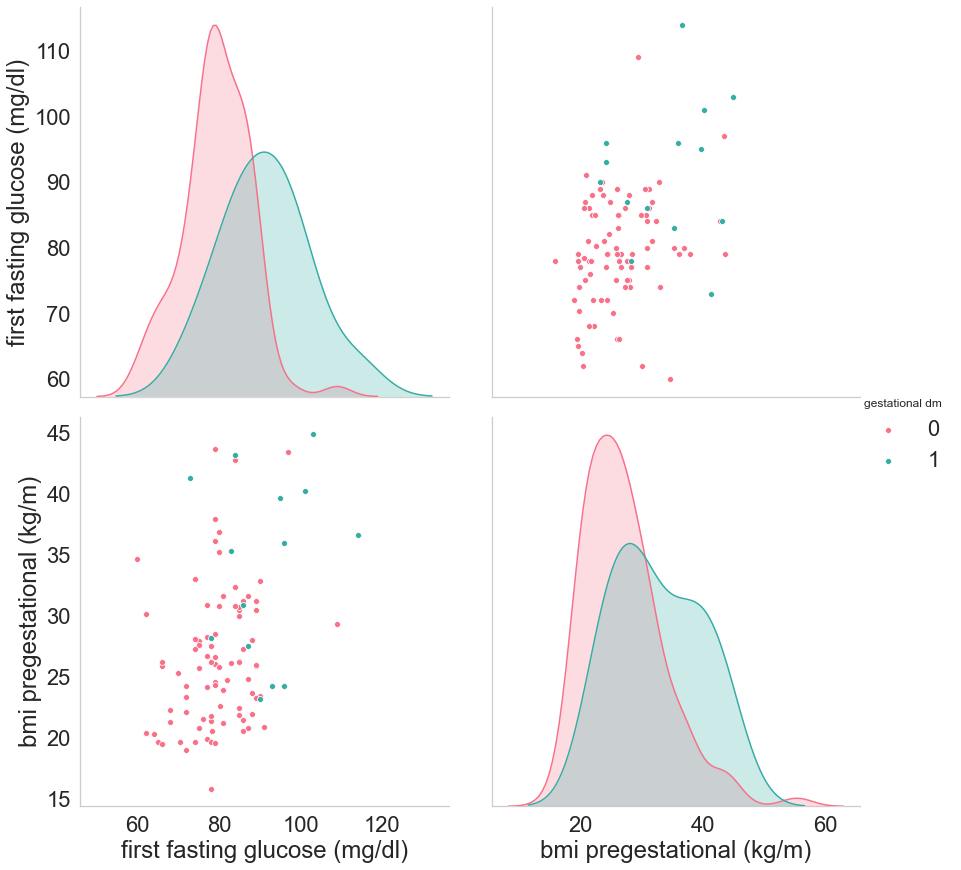

In [53]:
g = sns.pairplot(df,height=3, size=6, vars=["first fasting glucose (mg/dl)", "bmi pregestational (kg/m)"], hue="gestational dm", palette="husl")
g=sns.set_style("whitegrid", {'axes.grid' : False})
plt.savefig('../reports/figures/sugar-bmi.png')

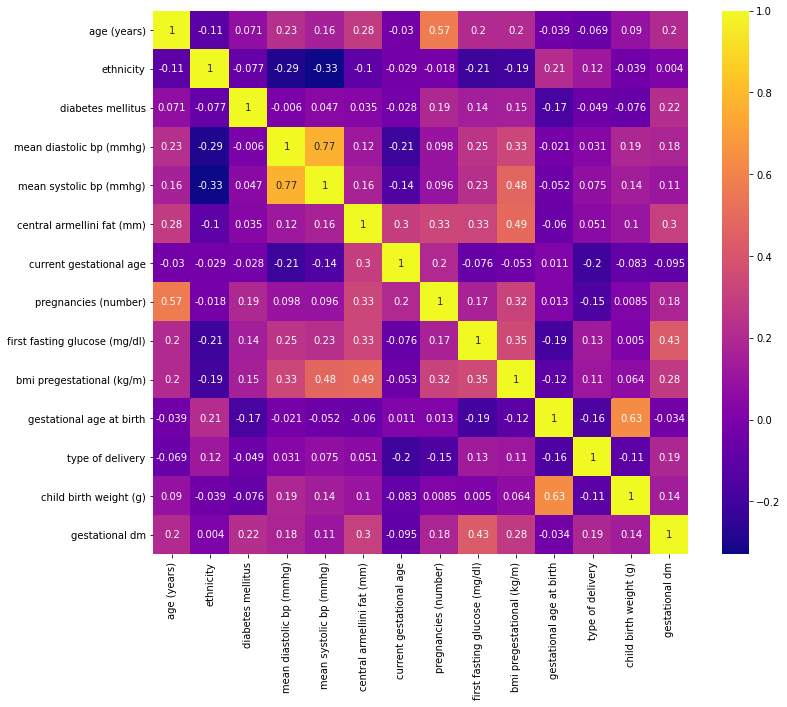

In [15]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="plasma")
plt.savefig("../reports/figures/correlation_matrix")

gestational dm
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

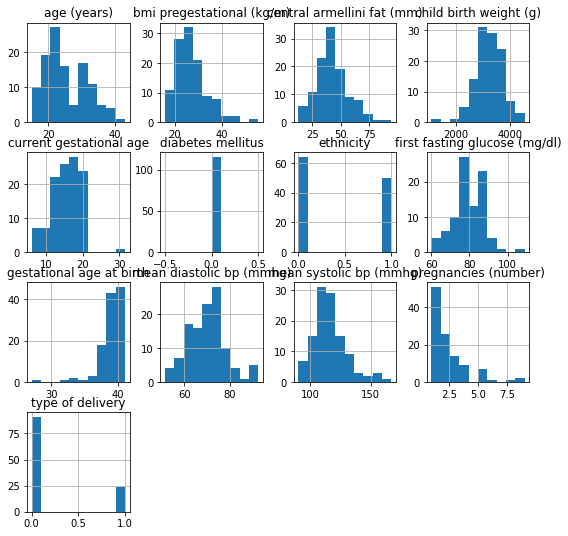

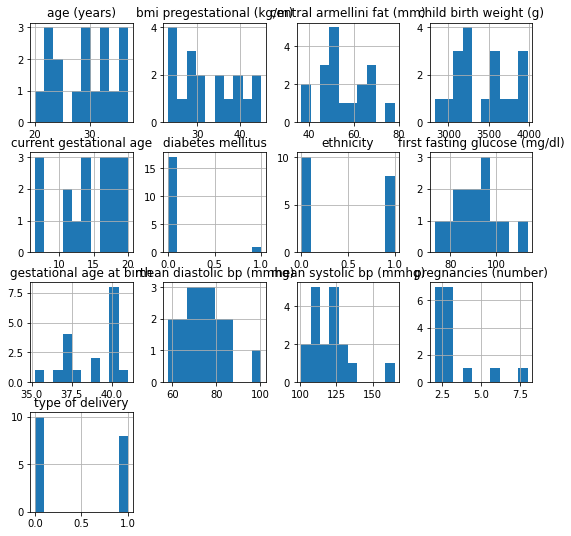

In [16]:
df.groupby('gestational dm').mean()
df.groupby('gestational dm').hist(figsize=(9, 9))

## Drop irrelevant columns:
Features such as type of delivery, child birth weight, gestational age at birth can be dropped before training as these do not satisfy inclusion criteria. These events happen at the final stage of pregnancy and therefore have no role on gdm which is diagnosed between 26-28 weeks.

In [44]:
df.drop(df.columns[[2, 10, 11, 12]], axis = 1, inplace = True) 
#Drop the outlier,as it is irrelevant for the study.
df.drop(df[df['current gestational age'] > 25].index, inplace = True) 
df.shape

(132, 10)

Mitigating potential biases caused by missing data in EHR:
Reference: https://www.sciencedirect.com/science/article/pii/S1532046417300588
https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb

## Imputing Missing value

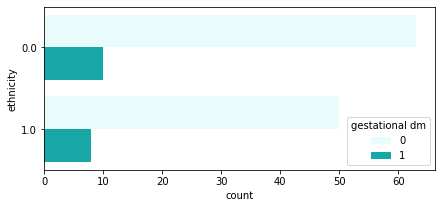

In [43]:
#Filling missing value in categorical feature, ethnicity
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="ethnicity", data=mean_bmi_df, color="c", hue='gestational dm');

Plot suggests I can randomly pick any value between 0 and 1 to fill up one missing value.

In [45]:
df["first fasting glucose (mg/dl)"].mean()

81.16764705882352

In [45]:
#mean imputation of first fasting glucose is equal to filling with normal value
mean_ffg=df["first fasting glucose (mg/dl)"].mean()
mean_ffg_df=df.fillna(value={"first fasting glucose (mg/dl)": round(mean_ffg,1)})
#mean imputation of pregnancy number
mean_preg=mean_ffg_df["pregnancies (number)"].mean()
mean_preg_df=mean_ffg_df.fillna(value={"pregnancies (number)": round(mean_preg,1)})
#mean imputation of pregnancy number
mean_bmi=mean_preg_df["bmi pregestational (kg/m)"].mean()
mean_bmi_df=mean_preg_df.fillna(value={"bmi pregestational (kg/m)": round(mean_bmi, 1)})
mean_ethnicity_df=mean_bmi_df.fillna(value={"ethnicity": 0})
mean_ethnicity_df.head()

,age (years),ethnicity,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational dm
0,20,0.0,73.5,125.0,28.1,12.1,1.0,81.2,33.20,0
1,28,0.0,75.5,112.0,43.1,11.5,1.0,76.0,21.50,0
2,21,1.0,70.5,116.0,41.4,12.6,1.0,86.0,21.41,0
3,25,0.0,92.5,167.0,39.6,16.2,4.0,81.2,55.36,0
4,33,1.0,79.0,137.0,67.8,11.2,2.0,86.0,30.85,1


In [46]:
#Save processed file (with outliers, mean imputation, without feature selection)
mean_ethnicity_df.to_csv('../data/processed/mean_impute_all_features.csv',index = False)